![OpenDataBanner](https://raw.githubusercontent.com/epicalekspwner/OpenDataCustomerAnalytics/main/_repoResources/bannerOpenDataCustomerAnalytics.svg)

## 📦 **Environment Initialization**
---

In [ ]:
######################################
### Installing Necessary Libraries ###
######################################

### Note: you can ignore any error regarding pip's dependency resolver since the dependencies are handled manually

### Data Analytics Libraries
!pip install scipy -U -q              # Prerequisite dependency for other libraries
!pip install numpy -U -q              # Scientific computing library designed for handling Arrays
!pip install numba -U -q              # JIT compilator
!pip install pandas -U -q             # Data analysis library designed for Handling DataFrames

### Data Visualization Libraries
!pip install folium -U -q             # Data visualization library enabling data visualization on interactive Leaflet map
!pip install mapclassify -U -q        # Classification schemes for Choropleth maps (in combinaison with GeoPandas/Folium)
!pip install matplotlib -U -q         # Data visualization library enabling interactive visualization
!pip install seaborn -U -q            # Data visualization library based on matplotlib enabling interactive data visualization through high-level code

### Geographics Libraries
!pip install geopandas -U -q          # Geospatial data processing and visualization library
!pip install pyproj -U -q             # Geospatial data processing library for handling and translating geocoordinates

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.


In [ ]:
#####################################
### Importing Necessary Libraries ###
#####################################

### Data Analytics Libraries
import numpy as np
import pandas as pd

### Data Visualization Libraries
import folium
import mapclassify
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

### Geographics Libraries
import geopandas as gpd
from geopandas import GeoDataFrame
from pyproj import Transformer
from shapely.geometry import Point

**<u>Note</u>**: As suggested by the simultaneous import of both libraries (```pandas``` & ```geopandas```), the processing of DataFrames is slightly different depending on whether or not they contain <u>usable geospatial data</u> (i.e., processed geocoordinates). Therefore, in order to be as clear and consistent as possible throughout this Notebook, the following terminology will be applied:

- **```df_```**: &nbsp;&nbsp;&nbsp; standard DataFrame (**without** usable geocoordinates)
- **```gdf_```**: &nbsp; geographic DataFrame (**with** usable geocoordinates)

## 🌐 **Base Geographic Correlation Table**
---

### 🏗️ **Initialization**

The **```PLZO_CSV_LV95.csv```** file represents the base geographic correlation table containing the following attributes:

- **```Ortschaftsname```**: &nbsp; Official name of the locality
- **```PLZ```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Four-digit postal code (ZIP), in the range between 1000 and 9999
- **```Zusatzziffer```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Additional two-digit number, in the range between 0 and 99, combined with the ZIP to build the ZIP6
- **```Gemeindename```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Name of the main commune of the locality
- **```BFS-Nr```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Number of the main commune of the locality
- **```Kantonskürzel```**: &nbsp;&nbsp;&nbsp; Abbreviation of the canton in which the locality is predominantly located
- **```E```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; East coordinate (LV95) indicating the position of any point within the perimeter of the locality
- **```N```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; North coordinate (LV95) indicating the position of any point within the perimeter of the locality
- **```Sprache```**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Official or majority language of the locality

In the rest of this notebook, this primary correlation table will be referred as **```locZipComCanCooLang```** and will be linked to additional correlation tables in order to build the whole geographic architecture, which is indispensable to integrate Open Data with the internal ones but also to allow different levels of analysis.


In [ ]:
### Import Base Geographic Correlation Table ('PLZO_CSV_LV95.csv')
df_locZipComCanCooLang = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryCorrelation/locZipComCanCooLang/PLZO_CSV_LV95.csv')

In order to improve code readability and efficiency, the attributes will be renamed in the following manner:

- **```Ortschaftsname```** &nbsp; 🠊 &nbsp; **```Locality```**
- **```PLZ```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```ZIP```**
- **```Zusatzziffer```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```AdditionalDigit```**
- **```Gemeindename```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```Commune```**
- **```BFS-Nr```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```CommuneFSO```**
- **```Kantonskürzel```** &nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```Canton```**
- **```E```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```CoordinateEast```**
- **```N```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```CoordinateNorth```**
- **```Sprache```** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; **```Language```**

In [ ]:
### Rename Attributes
df_locZipComCanCooLang = df_locZipComCanCooLang.rename(columns = {
    'Ortschaftsname': 'Locality',
    'PLZ':            'ZIP',
    'Zusatzziffer':   'AdditionalDigit',
    'Gemeindename':   'Commune',
    'BFS-Nr':         'CommuneFSO',
    'Kantonskürzel':  'Canton',
    'E':              'CoordinateEast',
    'N':              'CoordinateNorth',
    'Sprache':        'Language'
})

In [ ]:
### Visualize 'locZipComCanCooLang' DataFrame
df_locZipComCanCooLang

Locality   ZIP  AdditionalDigit             Commune  \
0        Aeugst am Albis  8914                0     Aeugst am Albis   
1            Aeugstertal  8914                2     Aeugst am Albis   
2              Zwillikon  8909                0  Affoltern am Albis   
3     Affoltern am Albis  8910                0  Affoltern am Albis   
4             Bonstetten  8906                0          Bonstetten   
...                  ...   ...              ...                 ...   
4123             Ruggell  9491                0             Ruggell   
4124        Schellenberg  9488                0        Schellenberg   
4125           Thunersee  9999                1           Thunersee   
4126         Brienzersee  9999                2         Brienzersee   
4127           Bielersee  9999                0      Bielersee (BE)   

      CommuneFSO Canton  CoordinateEast  CoordinateNorth Language  
0              1     ZH     2679435.817      1235653.185       de  
1              1     ZH     2679815.475      1237410.215       de  
2              2     ZH     2675104.519      1237890.488       de  
3              2     ZH     2676439.358      1236966.371       de  
4              3     ZH     2677798.571      1241024.843       de  
...          ...    ...             ...              ...      ...  
4123        7010     LI     2758240.812      1234338.738       de  
4124        7011     LI     2759569.643      1233302.721       de  
4125        9073     BE     2621181.563      1170794.308       de  
4126        9089     BE     2640931.114      1175395.654       de  
4127        9149     BE     2580262.096      1215169.435       de  

[4128 rows x 9 columns]

The visualization of the DataFrame not only gives a better understanding of its content but also allows the identification of remaining points of concern. In the present case, there are mainly four main elements to considerate:

1. &nbsp;&nbsp; The utlity of the **```AdditionalDigit```** attribute for integrating Open Data
2. &nbsp;&nbsp; The presence of unusual **```ZIP```** code (9999)
3. &nbsp;&nbsp; The presence of Liechtenstein (LI) within **```Canton```**
4. &nbsp;&nbsp; The format and subsequent interpretability of **```CoordinateEast```** & **```CoordinateNorth```**

### 🧹 **Cleaning**

#### 1️⃣ **```AdditionalDigit```**

In the first place, one might think that the ZIP codes are suitable primary keys from a geographical perspective for integrating Open Data with internal ones. However, in Switzerland, although this is the case in most instances, a given ZIP code is not necessarily linked to a unique locality or commune. Therefore, the standard four-digit ZIP code cannot be used as a primary key for identifying a given locality or commune.

To remedy this, one possibility is to extend the standard four-digit **```ZIP```** (referred to as ZIP4) by adding an additional two-digit number (**```AdditionalDigit```**) suffixed to the latter in order to create a new identification number (referred to as ZIP6). The main motivation for the existence of this ID is a postal organizational concern. However, from a practical point of view for integrating Open Data, the ZIP6 is irrelevant as it is not used anywhere in the statistical datasets.

However, as it can be seen through the **```locZipComCanCooLang```** DataFrame and its attributes, statistical datasets issued by the Federal Statistics Office (FSO) are using another internal identifiant (**```CommuneFSO```**) for mapping and integrating data from a geographical point of view. This approach implies a loss of granularity as the highest level of granularity available is now at the level of communes and no longer at the level of localities. Nevertheless, this is not a issue as statistical data are not anyway available below the communal level of granularity.

In consequence, **```AdditionalDigit```** will be simply removed since this attribute is depreciated by the existence of **```CommuneFSO```**, which is more suitable for performing subsequent Open Data integrations as we will see further.

In [ ]:
### Drop Depreciated Attribute 'AdditionalDigit'
df_locZipComCanCooLang = df_locZipComCanCooLang.drop(['AdditionalDigit'], axis = 1)

#### 2️⃣ **```ZIP```**

At the very end of the **``ZIP``** column, we can note the presence of a ZIP 9999 for the following three localities: Thunersee, Brienzersee & Bielersee. As already mentioned previously, the concern is not with having an identical ZIP for several locations but with the cut-off value of the ZIP (9999), which could indicate that it could be used as a temporary placeholder or that the ZIP has been depreciated. 

To determine if the 9999 ZIP has indeed been depreciated (following a merger of localities, for instance), we can use the tool made available by Swiss Post (https://www.post.ch/en/pages/plz-suche) to search for an actual locality/ZIP combination. As presumed, a search for the ZIP 9999 returns no result. Therefore, we can delete the corresponding depreciated rows from the dataset. 

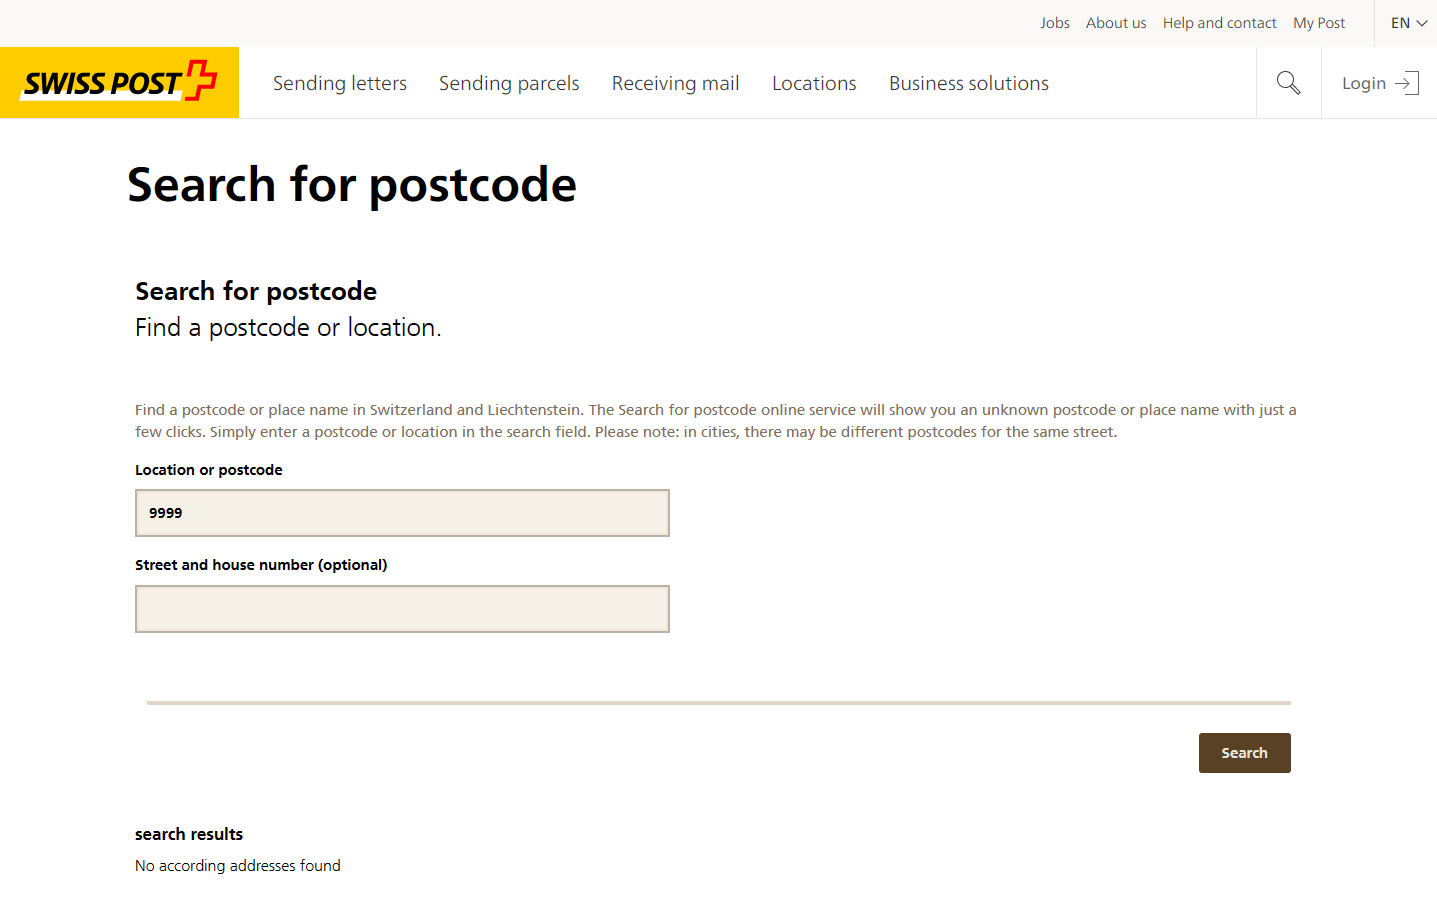

**Source**: [Screenshot] Search for postcode. Swiss Post. https://www.post.ch/en/pages/plz-suche


In [ ]:
### Drop Depreciated Rows Having a '9999' ZIP
df_locZipComCanCooLang.drop(df_locZipComCanCooLang[df_locZipComCanCooLang.ZIP == 9999].index, inplace = True)

#### 3️⃣ **```Canton```**

As suggested by some of the DataFrame's rows, Liechtenstein (LI) is also considered as an "additional" canton in addition to the 26 Swiss cantons. In the context of this research, we can remove the rows relative to Liechtenstein (LI) as the integration and analysis of Open Data will only be performed on a national level.

In [ ]:
# Drop Rows Having 'LI' as Canton
df_locZipComCanCooLang.drop(df_locZipComCanCooLang[df_locZipComCanCooLang.Canton == 'LI'].index, inplace = True)

#### 4️⃣ **```CoordinateEast```** & **```CoordinateNorth```**

Usually, we are used to seeing the geographical coordinates expressed as a Latitude/Longitude combination in degrees with:

- The **Latitude** representing the relative position to the Equator (North or South)
- The **Longitude** representing the relative position to the Prime Meridian or mean zero point in Greenwich (East or West)

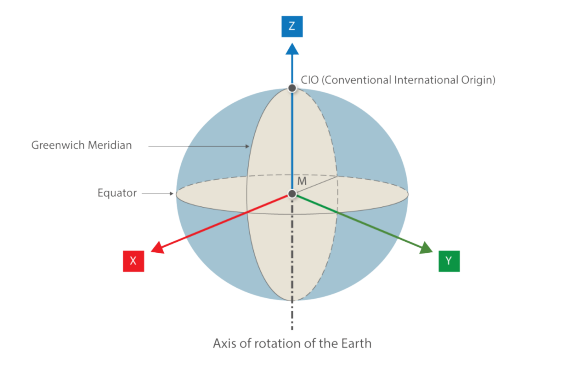

**Source**: [Illustration] Federal Office of Topography Swisstopo. https://www.swisstopo.admin.ch/en/knowledge-facts/surveying-geodesy/reference-systems.html

However, by examining the coordinates contained in the DataFrame's last two columns, we can observe that they are not compatible with the Conventional Terrestrial System (CTS, in which Latitude/Longitude are expressed in degrees with respect to their respective reference marks previously mentioned). By going through in the documentation issued by the FSO, we can notice that the coordinates contained by the base geographic correlation table are expressed in a local reference system called ```LV95```.

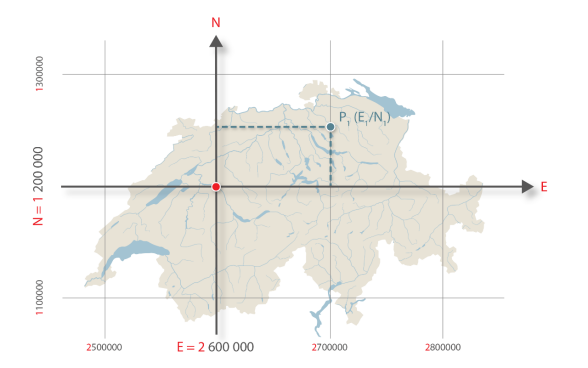

**Source**: [Illustration] Federal Office of Topography Swisstopo. https://www.swisstopo.admin.ch/en/knowledge-facts/surveying-geodesy/reference-frames/local/lv95.html


The fundamental point of this local reference system is located at the geostation of Zimmerwald in the canton of Bern (represented by the red point on the illustration). The location of any point is given by a pair of East/North coordinates. To be able to correctly process and visually plot the data, it is necessary to switch to the ```WGS84``` Geodetic Reference System (GRS) by converting the ```LV95``` coordinates.

For this purpose, the ```pyproj``` library provides the convenient ```Transformer``` module and its related ```from_crs``` method which allow to easily convert geocoordinates. 
To correctly initialize the coordinates' ```transformer```, it is necessary to provide the latter with two main parameters: the current Geodetic Reference System (```EPSG:2056```, with is the geodetic code for the ```LV95``` Local Reference System used in Switzerland) and the targeted one (```EPSG:4326```, which is the geodetic code for the ```WGS84``` Standard Reference System). 

In [ ]:
### Initialize Coordinates' Transformer
transformer = Transformer.from_crs('EPSG:2056', 'EPSG:4326')

In [ ]:
### Convert Latitude from LV95 to WGS84
df_locZipComCanCooLang['Lat'] = df_locZipComCanCooLang.apply(lambda x: transformer.transform(x.CoordinateEast, x.CoordinateNorth)[0], axis=1)

### Convert Longitude from LV95 to WGS84
df_locZipComCanCooLang['Lon'] = df_locZipComCanCooLang.apply(lambda x: transformer.transform(x.CoordinateEast, x.CoordinateNorth)[1], axis=1)

In [ ]:
### Create Geometry Attribute
geometry_locZipComCanCooLang = [Point(xy) for xy in zip(df_locZipComCanCooLang.Lon, df_locZipComCanCooLang.Lat)]

In [ ]:
### Drop Depreciated Columns
df_locZipComCanCooLang = df_locZipComCanCooLang.drop(['Lat', 'Lon', 'CoordinateEast', 'CoordinateNorth'], axis = 1)

In [ ]:
### Create GeoDataFrame with Geometry Attribut
gdf_locZipComCanCooLang = GeoDataFrame(df_locZipComCanCooLang, crs = 'EPSG:4326', geometry = geometry_locZipComCanCooLang)

In [ ]:
### Visualize GeoDataFrame
gdf_locZipComCanCooLang

Locality   ZIP             Commune  CommuneFSO Canton  \
0        Aeugst am Albis  8914     Aeugst am Albis           1     ZH   
1            Aeugstertal  8914     Aeugst am Albis           1     ZH   
2              Zwillikon  8909  Affoltern am Albis           2     ZH   
3     Affoltern am Albis  8910  Affoltern am Albis           2     ZH   
4             Bonstetten  8906          Bonstetten           3     ZH   
...                  ...   ...                 ...         ...    ...   
4107            Miécourt  2946          La Baroche        6810     JU   
4108          Charmoille  2947          La Baroche        6810     JU   
4109         Fregiécourt  2953          La Baroche        6810     JU   
4110           Pleujouse  2953          La Baroche        6810     JU   
4111               Asuel  2954          La Baroche        6810     JU   

     Language                  geometry  
0          de  POINT (8.48831 47.26700)  
1          de  POINT (8.49364 47.28276)  
2          de  POINT (8.43146 47.28763)  
3          de  POINT (8.44895 47.27917)  
4          de  POINT (8.46761 47.31551)  
...       ...                       ...  
4107       fr  POINT (7.17643 47.42607)  
4108       fr  POINT (7.20440 47.42349)  
4109       fr  POINT (7.19794 47.41169)  
4110       fr  POINT (7.21100 47.41187)  
4111       fr  POINT (7.21115 47.40197)  

[4112 rows x 7 columns]

### 🛂 **Characteristics & Sanity Check**

Before proceeding further with the integration of geographical granularity, it is necessary to check a certain number of conditions must be respected within this GeoDataFrame as it constitutes the fundamental basis of the geographical architecture necessary for correctly and efficiently integrating Open Data with internal ones.

#### 1️⃣ **Data Types**

The method ```dtypes``` enables us to verify the data types of each column of the GeoDataFrame.

In [ ]:
### Get Types of GeoDataFrame Columns
gdf_locZipComCanCooLang.dtypes

Locality        object
ZIP              int64
Commune         object
CommuneFSO       int64
Canton          object
Language        object
geometry      geometry
dtype: object

The data types are mostly ```object``` and ```int64```, which ensure their translatability into ```string``` for an easy subsequent data integration.

The last column data type is indeed ```geometry```, which enable the visual representation of data.  

#### 2️⃣ **Duplicate ```Locality```**

In order to find duplicate localities, it is necessary to establish a logical search rule. Indeed, simply looking for duplicate rows would not make sense as it is not necessary for the set of attributes to be strictly identical to consider that a locality is present more than once within the baseline GeoDataFrame.

In this case, the search rule used in the ```duplicated``` method is that a line is duplicate if **```locality```**, **```ZIP```** and **```CommuneFSO```** are identical between several lines. It is important to note that it is crucial to include the **```ZIP```** in the search rule as large cities are mostly divided geographically into several postal distribution areas, and therefore several distinct ZIPs for a given city. It is also important to include the **```CommuneFSO```** as a given locality can be part of several distinct communes.

In [ ]:
### Retrieve Duplicate Rows (Search Rule: Identitical 'Locality', 'ZIP' & 'CommuneFSO')
gdf_locZipComCanCooLang[gdf_locZipComCanCooLang[['Locality', 'ZIP', 'CommuneFSO']].duplicated(keep = False) == True].sort_values('Locality')

Locality   ZIP        Commune  CommuneFSO Canton Language  \
2820        Aquila  6719         Blenio        5049     TI       it   
2819        Aquila  6719         Blenio        5049     TI       it   
3846  Baltschieder  3937   Baltschieder        6281     VS       de   
3845  Baltschieder  3937   Baltschieder        6281     VS       de   
1626         Basel  4052          Basel        2701     BS       de   
...            ...   ...            ...         ...    ...      ...   
1896         Wangs  7323  Vilters-Wangs        3297     SG       de   
1761    Wilchingen  8217     Wilchingen        2974     SH       de   
1760    Wilchingen  8217     Wilchingen        2974     SH       de   
2188          Zuoz  7524           Zuoz        3791     GR       rm   
2189          Zuoz  7524           Zuoz        3791     GR       rm   

                      geometry  
2820  POINT (8.94822 46.50390)  
2819  POINT (9.01000 46.58184)  
3846  POINT (7.88113 46.37594)  
3845  POINT (7.86485 46.30945)  
1626  POINT (7.60743 47.54737)  
...                        ...  
1896  POINT (9.43215 47.03072)  
1761  POINT (8.46467 47.66924)  
1760  POINT (8.51937 47.65550)  
2188  POINT (9.88666 46.61164)  
2189  POINT (9.95631 46.60139)  

[78 rows x 7 columns]

The partial GeoDataFrame above shows 78 rows identified as duplicate according to the previously formulated search condition. In fact, we can see that the duplicate rows are always formed as a pair, which means that ```78/2 = 39``` rows should be removed. By using the ```drop_duplicates``` method with the same condition previously formulated, we end up with 4,073 rows in the GeoDataFrame, which effectively corresponds with the expectations ```(4,112 - 39 = 4,073)```.

In [ ]:
### Drop Duplicate Rows
gdf_locZipComCanCooLang.drop_duplicates(subset = ['Locality', 'ZIP', 'CommuneFSO'], keep = 'first', inplace = True)

In [ ]:
### Visualize GeoDataFrame
gdf_locZipComCanCooLang

Locality   ZIP             Commune  CommuneFSO Canton  \
0        Aeugst am Albis  8914     Aeugst am Albis           1     ZH   
1            Aeugstertal  8914     Aeugst am Albis           1     ZH   
2              Zwillikon  8909  Affoltern am Albis           2     ZH   
3     Affoltern am Albis  8910  Affoltern am Albis           2     ZH   
4             Bonstetten  8906          Bonstetten           3     ZH   
...                  ...   ...                 ...         ...    ...   
4107            Miécourt  2946          La Baroche        6810     JU   
4108          Charmoille  2947          La Baroche        6810     JU   
4109         Fregiécourt  2953          La Baroche        6810     JU   
4110           Pleujouse  2953          La Baroche        6810     JU   
4111               Asuel  2954          La Baroche        6810     JU   

     Language                  geometry  
0          de  POINT (8.48831 47.26700)  
1          de  POINT (8.49364 47.28276)  
2          de  POINT (8.43146 47.28763)  
3          de  POINT (8.44895 47.27917)  
4          de  POINT (8.46761 47.31551)  
...       ...                       ...  
4107       fr  POINT (7.17643 47.42607)  
4108       fr  POINT (7.20440 47.42349)  
4109       fr  POINT (7.19794 47.41169)  
4110       fr  POINT (7.21100 47.41187)  
4111       fr  POINT (7.21115 47.40197)  

[4073 rows x 7 columns]

#### 3️⃣ **```ZIP``` Compliancy & Validity**

Regarding the **```ZIP```**, two characteristics must be verified:
- A ZIP code must be a 4-digit number to be format compliant.
- A ZIP code must be in the range between 1000 and 9999 to be valid.

However, a ZIP code is not necessarily unique since multiple localities could share the same ZIP code.

In [ ]:
### Compute ZIP Digit Length
ZIPDigitLength = gdf_locZipComCanCooLang['ZIP'].map(str).apply(len).unique()

### Check ZIP Format Compliancy
ZIPCompliance = str(ZIPDigitLength[0]) == '4'

### Check ZIP Format Validity
ZIPValidity = gdf_locZipComCanCooLang['ZIP'].apply(lambda x: True if x >= 1000 and x <= 9999 else False).unique()[0] == True

### Show Results
if ZIPCompliance == True and ZIPValidity == True:
  print('All ZIP codes comply with a valid 4-digit format.')
else:
  print('All ZIP codes do not comply with a valid 4-digit format.')

All ZIP codes comply with a valid 4-digit format.


#### 4️⃣ **```Commune``` & ```CommuneFSO``` Matching**

To ensure the integrity of the integration, it is necessary to ensure that a **```Commune-CommuneFSO```** combination is unique as **```CommuneFSO```** will be used as a unique identifier for matching Open Data with internal ones based on this geographic element. For this purpose, we can first check the overall number of occurrences for each of these attributes before ascertaining that each **```Commune```** is only associated with one and only one **```CommuneFSO```** ID.

In [ ]:
### Count Unique Items in 'Commune' Column
ctCommuneNunique = gdf_locZipComCanCooLang['Commune'].nunique()

### Count Unique Items in 'CommuneFSO' Column
ctCommuneFSONunique = gdf_locZipComCanCooLang['CommuneFSO'].nunique()

### Check Count Equality
eqCommuneCommuneFSO = ctCommuneNunique == ctCommuneFSONunique

### Show Results
if eqCommuneCommuneFSO == True:
  print('The equality between [Commune] & [CommuneFSO] is respected (same number of unique items (' + (str(ctCommuneNunique)) + ') in both columns).')
else:
  print(('The equality between [Commune] & [CommuneFSO] is not respected (different number of unique items between both columns: ' + str(ctCommuneNunique) + ' [Commune] vs. ' + str(ctCommuneFSONunique) + ' [CommuneFSO]).'))

The equality between [Commune] & [CommuneFSO] is respected (same number of unique items (2148) in both columns).


In [ ]:
### Check Consistency of Commune/CommuneFSO Combination
consistencyCommuneCommuneFSO = gdf_locZipComCanCooLang.groupby(['Commune', 'CommuneFSO', 'Canton']).count().reset_index()

In [ ]:
### Show Results
consistencyCommuneCommuneFSO[consistencyCommuneCommuneFSO[['Commune', 'CommuneFSO', 'Canton']].duplicated(keep = False) == True].sort_values('Commune')

Empty DataFrame
Columns: [Commune, CommuneFSO, Canton, Locality, ZIP, Language, geometry]
Index: []

In [ ]:
### Additional Check: Count Unique Appearance of each Commune & Compare Total Later on with Additional Dataset
print(str(consistencyCommuneCommuneFSO['Commune'].nunique()) + ' unique communes')

2148 unique communes


#### 5️⃣ **```Canton``` Completeness**

Regarding the **```Canton```** attribute, it is necessary to ensure the presence of the 26 Swiss cantons (under their abbreviated denomination) and no other external elements. This attribute is extremely significant as the vast majority of published Swiss Open Data has a cantonal granularity.

In [ ]:
### Retrieve Unique Items in 'Canton' Column
canList = gdf_locZipComCanCooLang['Canton'].unique().tolist()
canList.sort()

### Number of Cantons
canListLength = len(canList)

### Show Results
if canListLength == 26:
  print('All 26 cantons are effectively present in the GeoDataFrame:')
else:
  print('Only ' + str(canListLength) + ' are present in the GeoDataFrame:')
print(canList)

All 26 cantons are effectively present in the GeoDataFrame:
['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG', 'ZH']


#### 6️⃣ **```Language``` Completeness**

Regarding the **```Language```** attribute, it is necessary to ensure the presence of the 4 national languages (under their abbreviated denomination) and no other external elements.

In [ ]:
### Retrieve Unique Items in 'Language' Column
langList = gdf_locZipComCanCooLang['Language'].unique().tolist()
langList.sort()

### Number of Languages
langListLength = len(langList)

### Show Results
if langListLength == 4:
  print('All 4 national languages are effectively present in the GeoDataFrame:')
else:
  print('Only ' + str(langListLength) + ' are present in the GeoDataFrame:')
print(langList)

All 4 national languages are effectively present in the GeoDataFrame:
['de', 'fr', 'it', 'rm']


### 💾 **Pre-Processed GeoDataFrame**

In [ ]:
### Visualize GeoDataFrame
gdf_locZipComCanCooLang

Locality   ZIP             Commune  CommuneFSO Canton  \
0        Aeugst am Albis  8914     Aeugst am Albis           1     ZH   
1            Aeugstertal  8914     Aeugst am Albis           1     ZH   
2              Zwillikon  8909  Affoltern am Albis           2     ZH   
3     Affoltern am Albis  8910  Affoltern am Albis           2     ZH   
4             Bonstetten  8906          Bonstetten           3     ZH   
...                  ...   ...                 ...         ...    ...   
4107            Miécourt  2946          La Baroche        6810     JU   
4108          Charmoille  2947          La Baroche        6810     JU   
4109         Fregiécourt  2953          La Baroche        6810     JU   
4110           Pleujouse  2953          La Baroche        6810     JU   
4111               Asuel  2954          La Baroche        6810     JU   

     Language                  geometry  
0          de  POINT (8.48831 47.26700)  
1          de  POINT (8.49364 47.28276)  
2          de  POINT (8.43146 47.28763)  
3          de  POINT (8.44895 47.27917)  
4          de  POINT (8.46761 47.31551)  
...       ...                       ...  
4107       fr  POINT (7.17643 47.42607)  
4108       fr  POINT (7.20440 47.42349)  
4109       fr  POINT (7.19794 47.41169)  
4110       fr  POINT (7.21100 47.41187)  
4111       fr  POINT (7.21115 47.40197)  

[4073 rows x 7 columns]

### 📊 **Baseline GeoDataFrame Visualization**

In [ ]:
### Interactive Visualization (Simplest Version)
gdf_locZipComCanCooLang.explore(width='100%')

## 🌐 **Additional Geographic Correlation Table: Institutional Levels**
---

Although the baseline dataset has been primarily processed, it is still necessary to compile additional datasets to retrive the IDs of each institutional level of analysis used through the integration of Open Data.  

### 📦 **Import Polygons (Geometry)**

**File Nomenclature**

- ```K4suis18480101gf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Switzerland
- ```K4kant20220101gf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Cantons
- ```K4bezk20220101gf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Districts
- ```K4polg20220101gf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Communes

**File Types**

- ```.cpg``` &nbsp; 🠊 &nbsp; Code Page File containing the encoding format adopted to craft the shapefile 
- ```.dbf``` &nbsp; 🠊 &nbsp; dBASE File containing attribute data and object IDs
- ```.prj``` &nbsp; 🠊 &nbsp; Projection File containing associated metadata with shapefile content and projection system
- ```.qpj``` &nbsp; 🠊 &nbsp; Projection File containing coordinate reference system and map projection function enabling 3D to 2D translation
- ```.shp``` &nbsp; 🠊 &nbsp; Shapefile containing spatial vector data (polygons)
- ```.shx``` &nbsp; 🠊 &nbsp; Shape Index File containing positional index enabling forward and backward serach 

**<ins>Note</ins>**: 

- All these files are required to enable the visualization. 

- The prefix ```/vsicurl``` enables the importation of related files from the URL of the main Shapefile.

In [ ]:
### Import Polygons (Geometry) For Switzerland (inst1) 
geoInst1 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/inst1_Switzerland/K4suis18480101gf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Cantons (inst2)
geoInst2 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/inst2_Cantons/K4kant20220101gf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Districts (inst3)
geoInst3 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/inst3_Districts/K4bezk20220101gf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Communes (inst4)
geoInst4 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/inst4_Communes/K4polg20220101gf_ch2007Poly.shp')

### 📊 **Test Visualization Rendering**

In [ ]:
### Test Geometry Visualization For Switzerland (inst1)
geoInst1.explore()

In [ ]:
### Test Geometry Visualization For Cantons (inst2)
geoInst2.explore()

In [ ]:
### Test Geometry Visualization For Districts (inst3)
geoInst3.explore()

In [ ]:
### Test Geometry Visualization For Communes (inst4)
geoInst4.explore()

### 📦 **Import Additional Geographic Correlation Tables**

The objective is to merge attributes of interest across the 3 correlation tables in order to map the resulting correlation table with the baseline one to ensure the availability of the necessary attributes to proceed with the integration of Open Data. 

#### 1️⃣ **```CommuneFSO``` 🠊 ```DistrictFSO```**

**Attribute Nomenclature**
- **```GDENR```** &nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; ```CommuneFSO``` &nbsp;&nbsp;&nbsp; (FSO-ID of the commune)
- **```GDENAME```** &nbsp;🠊 &nbsp; ```Commune``` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (Official name of the commune)
- **```GDEBZNR```** &nbsp;🠊 &nbsp; ```DistrictFSO``` &nbsp; (FSO-ID of the district)

In [ ]:
### Import 1st Additional Geographic Correlation Table ('be-t-00.04-agv-01_GDE.csv')
df_ComDis = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryCorrelation/addGeoCorrTables/be-t-00.04-agv-01_GDE.csv')

### Retain Attributes of Interest
df_ComDis = df_ComDis[['GDENR', 'GDENAME', 'GDEBZNR']]

### Rename Attributes
df_ComDis = df_ComDis.rename(columns = {
    'GDENR':    'CommuneFSO',
    'GDENAME':  'Commune',
    'GDEBZNR':  'DistrictFSO'
})

In [ ]:
### Visualize DataFrame
df_ComDis.head(5)

CommuneFSO             Commune  DistrictFSO
0           1     Aeugst am Albis          101
1           2  Affoltern am Albis          101
2           3          Bonstetten          101
3           4     Hausen am Albis          101
4           5            Hedingen          101

#### 2️⃣ **```DistrictFSO``` 🠊 ```District``` & ```Canton```**

**Attribute Nomenclature**
- **```GDEKT```** &nbsp;&nbsp;&nbsp;&nbsp; 🠊 &nbsp; ```Canton``` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (Abbreviation of the canton)
- **```GDEBZNR```** &nbsp;🠊 &nbsp; ```DistrictFSO``` &nbsp; (FSO-ID of the district)
- **```GDEBZNA```** &nbsp;🠊 &nbsp; ```District``` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (Name of the district)

In [ ]:
### Import 2nd Additional Geographic Correlation Table ('be-t-00.04-agv-01_BZN.csv')
df_DisFSO = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryCorrelation/addGeoCorrTables/be-t-00.04-agv-01_BZN.csv')

### Retain Attributes of Interest
df_DisFSO = df_DisFSO[['GDEKT', 'GDEBZNR', 'GDEBZNA']]

### Rename Attributes
df_DisFSO = df_DisFSO.rename(columns = {
    'GDEKT':    'Canton',
    'GDEBZNR':  'DistrictFSO',
    'GDEBZNA':  'District'
})

In [ ]:
### Visualize DataFrame
df_DisFSO.head(5)

Canton  DistrictFSO            District
0     ZH          101    Bezirk Affoltern
1     ZH          102  Bezirk Andelfingen
2     ZH          103       Bezirk Bülach
3     ZH          104    Bezirk Dielsdorf
4     ZH          105       Bezirk Hinwil

#### 3️⃣ **```Canton``` 🠊 ```CantonFSO```**

**Attribute Nomenclature**
- **```KTNR```** &nbsp;&nbsp; 🠊 &nbsp; ```CantonFSO``` &nbsp; (FSO-ID of the canton)
- **```GDEKT```** &nbsp;🠊 &nbsp; ```Canton``` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (Abbreviation of the canton)



In [ ]:
### Import 3rd Additional Geographic Correlation Table ('be-t-00.04-agv-01_BZN.csv')
df_CanFSO = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryCorrelation/addGeoCorrTables/be-t-00.04-agv-01_KT.csv')

### Retain Attributes of Interest
df_CanFSO = df_CanFSO[['KTNR', 'GDEKT']]

### Rename Attributes
df_CanFSO = df_CanFSO.rename(columns = {
    'KTNR':   'CantonFSO',
    'GDEKT':  'Canton'
})

In [ ]:
### Visualize DataFrame
df_CanFSO.head(5)

CantonFSO Canton
0          0     CH
1          1     ZH
2          2     BE
3          3     LU
4          4     UR

### 🔗 **Merging Attributes Between DataFrames & GeoDataFrame**

In [ ]:
### Merge df_ComDis & df_DisFSO ['Commune', 'CommuneFSO'] => ['DistrictFSO'] <= ['District', 'Canton']
df_attributeMerging1 = df_ComDis.merge(df_DisFSO, left_on = 'DistrictFSO', right_on = 'DistrictFSO', how = 'left')

In [ ]:
### Visualize DataFrame
df_attributeMerging1

CommuneFSO             Commune  DistrictFSO Canton  \
0              1     Aeugst am Albis          101     ZH   
1              2  Affoltern am Albis          101     ZH   
2              3          Bonstetten          101     ZH   
3              4     Hausen am Albis          101     ZH   
4              5            Hedingen          101     ZH   
...          ...                 ...          ...    ...   
2143        6806        Vendlincourt         2603     JU   
2144        6807       Basse-Allaine         2603     JU   
2145        6808       Clos du Doubs         2603     JU   
2146        6809         Haute-Ajoie         2603     JU   
2147        6810          La Baroche         2603     JU   

                    District  
0           Bezirk Affoltern  
1           Bezirk Affoltern  
2           Bezirk Affoltern  
3           Bezirk Affoltern  
4           Bezirk Affoltern  
...                      ...  
2143  District de Porrentruy  
2144  District de Porrentruy  
2145  District de Porrentruy  
2146  District de Porrentruy  
2147  District de Porrentruy  

[2148 rows x 5 columns]

In [ ]:
### Merge df_attributeMerging1 & df_CanFSO ['Commune', 'CommuneFSO', 'District', 'DistrictFSO'] => ['Canton'] <= ['CantonFSO']
df_attributeMerging2 = df_attributeMerging1.merge(df_CanFSO, left_on = 'Canton', right_on = 'Canton', how = 'left')

In [ ]:
### Visualize DataFrame
df_attributeMerging2

CommuneFSO             Commune  DistrictFSO Canton  \
0              1     Aeugst am Albis          101     ZH   
1              2  Affoltern am Albis          101     ZH   
2              3          Bonstetten          101     ZH   
3              4     Hausen am Albis          101     ZH   
4              5            Hedingen          101     ZH   
...          ...                 ...          ...    ...   
2143        6806        Vendlincourt         2603     JU   
2144        6807       Basse-Allaine         2603     JU   
2145        6808       Clos du Doubs         2603     JU   
2146        6809         Haute-Ajoie         2603     JU   
2147        6810          La Baroche         2603     JU   

                    District  CantonFSO  
0           Bezirk Affoltern          1  
1           Bezirk Affoltern          1  
2           Bezirk Affoltern          1  
3           Bezirk Affoltern          1  
4           Bezirk Affoltern          1  
...                      ...        ...  
2143  District de Porrentruy         26  
2144  District de Porrentruy         26  
2145  District de Porrentruy         26  
2146  District de Porrentruy         26  
2147  District de Porrentruy         26  

[2148 rows x 6 columns]

In [ ]:
### Merge df_attributeMerging2 & gdf_locZipComCanCooLang
gdf_locZipComCanCooLangExtTemp = gdf_locZipComCanCooLang.merge(df_attributeMerging2, left_on = 'CommuneFSO', right_on = 'CommuneFSO', how = 'left')

In [ ]:
### Create ID Attribute for each Row
gdf_locZipComCanCooLangExtTemp['ID'] = gdf_locZipComCanCooLangExtTemp.index + 1

In [ ]:
### Retain Attributes of Interest
gdf_locZipComCanCooLangExtTemp = gdf_locZipComCanCooLangExtTemp[['ID', 'ZIP', 'Locality', 'Commune_x', 'CommuneFSO', 'District', 'DistrictFSO', 'Canton_x', 'CantonFSO', 'Language', 'geometry']]

In [ ]:
### Rename Attributes
gdf_locZipComCanCooLangExt = gdf_locZipComCanCooLangExtTemp.rename(columns = {
    'Commune_x': 'Commune',
    'Canton_x':  'Canton',
})

In [ ]:
### Check for Missing Values
gdf_locZipComCanCooLangExt[gdf_locZipComCanCooLangExt.isnull().any(axis=1)]

ID   ZIP  Locality                          Commune  CommuneFSO  \
3044  3045  6809  Medeglia  Comunanza Cadenazzo/Monteceneri        5391   

     District  DistrictFSO Canton  CantonFSO Language  \
3044      NaN          NaN     TI        NaN       it   

                      geometry  
3044  POINT (9.05853 46.14068)

In [ ]:
### Drop Depreciated Row
gdf_locZipComCanCooLangExt.drop(gdf_locZipComCanCooLangExt[gdf_locZipComCanCooLangExt.CommuneFSO == 5391].index, inplace = True)

In [ ]:
### Check Attribute Types
gdf_locZipComCanCooLangExt.dtypes

ID                int64
ZIP               int64
Locality         object
Commune          object
CommuneFSO        int64
District         object
DistrictFSO     float64
Canton           object
CantonFSO       float64
Language         object
geometry       geometry
dtype: object

In [ ]:
### Modify 'float64' Types Into 'int64'
gdf_locZipComCanCooLangExt.DistrictFSO = gdf_locZipComCanCooLangExt.DistrictFSO.astype('int64')
gdf_locZipComCanCooLangExt.CantonFSO = gdf_locZipComCanCooLangExt.CantonFSO.astype('int64')

In [ ]:
### Visualize GeoDataFrame
gdf_locZipComCanCooLangExt

ID   ZIP            Locality             Commune  CommuneFSO  \
0        1  8914     Aeugst am Albis     Aeugst am Albis           1   
1        2  8914         Aeugstertal     Aeugst am Albis           1   
2        3  8909           Zwillikon  Affoltern am Albis           2   
3        4  8910  Affoltern am Albis  Affoltern am Albis           2   
4        5  8906          Bonstetten          Bonstetten           3   
...    ...   ...                 ...                 ...         ...   
4068  4069  2946            Miécourt          La Baroche        6810   
4069  4070  2947          Charmoille          La Baroche        6810   
4070  4071  2953         Fregiécourt          La Baroche        6810   
4071  4072  2953           Pleujouse          La Baroche        6810   
4072  4073  2954               Asuel          La Baroche        6810   

                    District  DistrictFSO Canton  CantonFSO Language  \
0           Bezirk Affoltern          101     ZH          1       de   
1           Bezirk Affoltern          101     ZH          1       de   
2           Bezirk Affoltern          101     ZH          1       de   
3           Bezirk Affoltern          101     ZH          1       de   
4           Bezirk Affoltern          101     ZH          1       de   
...                      ...          ...    ...        ...      ...   
4068  District de Porrentruy         2603     JU         26       fr   
4069  District de Porrentruy         2603     JU         26       fr   
4070  District de Porrentruy         2603     JU         26       fr   
4071  District de Porrentruy         2603     JU         26       fr   
4072  District de Porrentruy         2603     JU         26       fr   

                      geometry  
0     POINT (8.48831 47.26700)  
1     POINT (8.49364 47.28276)  
2     POINT (8.43146 47.28763)  
3     POINT (8.44895 47.27917)  
4     POINT (8.46761 47.31551)  
...                        ...  
4068  POINT (7.17643 47.42607)  
4069  POINT (7.20440 47.42349)  
4070  POINT (7.19794 47.41169)  
4071  POINT (7.21100 47.41187)  
4072  POINT (7.21115 47.40197)  

[4072 rows x 11 columns]

## 🌐 **Additional Geographic Correlation Table: Analytical Levels**
---

Through the integration of different analytical levels, the objective is to gain additional knowledge on a geographical scope that could enable new analytical perspectives subsequently.

### 📦 **Import Polygons (Geometry)**

**File Nomenclature**

- ```K4greg20001205vf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Major Regions
- ```K4amre20001205vf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Labour Market Areas
- ```K4tour20170101vf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Tourist Regions
- ```k4slty20170101vf_ch2007Poly``` &nbsp; 🠊 &nbsp; Polygons for Urban/Rural Regions

**File Types**

- ```.cpg``` &nbsp; 🠊 &nbsp; Code Page File containing the encoding format adopted to craft the shapefile 
- ```.dbf``` &nbsp; 🠊 &nbsp; dBASE File containing attribute data and object IDs
- ```.prj``` &nbsp; 🠊 &nbsp; Projection File containing associated metadata with shapefile content and projection system
- ```.shp``` &nbsp; 🠊 &nbsp; Shapefile containing spatial vector data (polygons)
- ```.shx``` &nbsp; 🠊 &nbsp; Shape Index File containing positional index enabling forward and backward serach 

**<ins>Note</ins>**: 

- All these files are required to enable the visualization. 

- The prefix ```/vsicurl``` enables the importation of related files from the URL of the main Shapefile.

In [ ]:
### Import Polygons (Geometry) For Major Regions (analy_1)
geoAnaly1 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/analy1_MajorRegions/K4greg20001205vf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Labour Market Areas (analy_2)
geoAnaly2 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/analy2_LabourMarketAreas/K4amre20001205vf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Tourist Regions (analy_3)
geoAnaly3 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/analy3_TouristRegions/K4tour20170101vf_ch2007Poly.shp')

In [ ]:
### Import Polygons (Geometry) For Urban/Rural Regions (analy_4)
geoAnaly4 = gpd.read_file('/vsicurl/https://raw.github.com/epicalekspwner/OpenDataCustomerAnalytics/main/geographicArchitecture/geometryPolygons/analy4_UrbanRuralRegions/k4slty20170101vf_ch2007Poly.shp')

### 💱 **Convert Geodetic Reference System (GRS)**



As already done beforehand, it is necessary to convert the Geodetic Reference System (GRS) in order to compute operations on the coordinates subsequently as the points contained in the baseline correlation table are expressed in the ```EPSG:4326``` standard while the polygons are expressed in the ```EPSG:2056``` standard.

In [ ]:
### Convert CRS in 'geoAnaly1'
geoAnaly1 = geoAnaly1.to_crs(4326)

In [ ]:
### Convert CRS in 'geoAnaly2'
geoAnaly2 = geoAnaly2.to_crs(4326)

In [ ]:
### Convert CRS in 'geoAnaly3'
geoAnaly3 = geoAnaly3.to_crs(4326)

In [ ]:
### Convert CRS in 'geoAnaly4'
geoAnaly4 = geoAnaly4.to_crs(4326)

### ⚙️ **Point-in-Polygon Approach** 

Contrary to the precedent section (i.e., Institutional Levels), it is impossible to directly assign an analytical level since the FSO has not published any correlation table. However, they have published geodata in the same manner as for the institutional levels. Therefore, since we have access to both geodata regarding the localities (points) and the analytical levels (polygons), we should be able to determine which locality is part of which analytical level. 

To do this, it is necessary to compute whether a point given by coordinates is included in a given polygon bounded by its own coordinates. Thankfully, the ```geopandas``` library provides the method ```within``` to apply on a GeoDataFrame in order to do this computing. However, the implementation is not straightforward in that the operating sequence of this method is not recursive as shown below.

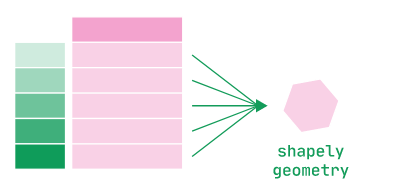

**<ins>Source</ins>**: [Illustration] GeoPandas. https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.within.html

Since the ```within``` method is sequentially comparing geodata and computing the results between the GeoDataFrames, it is necessary to find a workaround to be able to compare each locality to each analytical level. The solution adopted in this context is to create a new function allowing to obtain the correspondences by simply inputting the two GeoDataFrames.

In [ ]:
######################################################
### Function for Matching Points in Polygons (PiP) ###
######################################################

### Prerequisite: Polygon Names/Geometry Attribute Must Be Called 'name'/'geometry' in gdf_base

### gdf_base Contains Points while gdf_ext Contains Polygons 
def point_in_polygon_func(gdf_base, gdf_ext):
    
    ### Retrieving Polygon Names 
    listPolygons = list(gdf_ext.name)
    
    ### Initialize Empty DataFrame That Will Be Completed
    df = pd.DataFrame().reindex_like(gdf_base).dropna()

    ### Loop for Checking Each Polygon with a Given Point
    for i in listPolygons:
        
        ### Get Geometry For Specific Polygon
        geometryPolygon = gdf_ext.loc[gdf_ext.name == i]
        geometryPolygon.reset_index(drop = True, inplace = True)
        
        ### Identify PiP Matching
        pip = gdf_base.within(geometryPolygon.loc[0, 'geometry'])

        ### Keep Only PiP Matches 
        pip_data = gdf_base.loc[pip].copy()

        ### Retrieve Polygon Names
        pip_data['i'] = i

        ### Add the Latter to the DataFrame Previously Created
        df = pd.concat([df, pip_data])

    ### Drop Polygon Geometry    
    df.reset_index(inplace = True, drop = True)
    df = df.drop(columns = 'geometry')
    
    ### Return Computed DataFrame with Matches
    return df

#### 1️⃣ **Major Regions**

In [ ]:
### Apply Function to Map 'geoAnaly1' Level with Localities
analy1_att = point_in_polygon_func(gdf_locZipComCanCooLangExt, geoAnaly1)

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [ ]:
### Retain Attributes of Interest
sub_analy1_att = analy1_att[['ID', 'i']]

In [ ]:
### Rename Attribute of Interest
sub_analy1_att = sub_analy1_att.rename(columns = {
    'i': 'MajorRegion'
})

In [ ]:
### Extract IDs
sub_analy1_attFSO = geoAnaly1[['id', 'name']]

In [ ]:
### Merge MajorRegions & IDs
analy1_attFSO = sub_analy1_att.merge(sub_analy1_attFSO, left_on = 'MajorRegion', right_on = 'name', how = 'left') 

In [ ]:
### Rename Attribute
analy1_attFSO = analy1_attFSO.rename(columns = {
    'id': 'MajorRegionFSO'
})

In [ ]:
### Retain Attributes of Interest
analy1_attFSO = analy1_attFSO[['ID','MajorRegion', 'MajorRegionFSO']]

In [ ]:
### Merge DataFrame & GeoDataFrame
gdf_locZipComCanCooLangExt1 = gdf_locZipComCanCooLangExt.merge(analy1_attFSO, left_on = 'ID', right_on = 'ID', how = 'left')

In [ ]:
### Visualize Temp GeoDataFrame
gdf_locZipComCanCooLangExt1

ID   ZIP            Locality             Commune  CommuneFSO  \
0        1  8914     Aeugst am Albis     Aeugst am Albis           1   
1        2  8914         Aeugstertal     Aeugst am Albis           1   
2        3  8909           Zwillikon  Affoltern am Albis           2   
3        4  8910  Affoltern am Albis  Affoltern am Albis           2   
4        5  8906          Bonstetten          Bonstetten           3   
...    ...   ...                 ...                 ...         ...   
4067  4069  2946            Miécourt          La Baroche        6810   
4068  4070  2947          Charmoille          La Baroche        6810   
4069  4071  2953         Fregiécourt          La Baroche        6810   
4070  4072  2953           Pleujouse          La Baroche        6810   
4071  4073  2954               Asuel          La Baroche        6810   

                    District  DistrictFSO Canton  CantonFSO Language  \
0           Bezirk Affoltern          101     ZH          1       de   
1           Bezirk Affoltern          101     ZH          1       de   
2           Bezirk Affoltern          101     ZH          1       de   
3           Bezirk Affoltern          101     ZH          1       de   
4           Bezirk Affoltern          101     ZH          1       de   
...                      ...          ...    ...        ...      ...   
4067  District de Porrentruy         2603     JU         26       fr   
4068  District de Porrentruy         2603     JU         26       fr   
4069  District de Porrentruy         2603     JU         26       fr   
4070  District de Porrentruy         2603     JU         26       fr   
4071  District de Porrentruy         2603     JU         26       fr   

                      geometry        MajorRegion  MajorRegionFSO  
0     POINT (8.48831 47.26700)             Zürich             4.0  
1     POINT (8.49364 47.28276)             Zürich             4.0  
2     POINT (8.43146 47.28763)             Zürich             4.0  
3     POINT (8.44895 47.27917)             Zürich             4.0  
4     POINT (8.46761 47.31551)             Zürich             4.0  
...                        ...                ...             ...  
4067  POINT (7.17643 47.42607)  Espace Mittelland             2.0  
4068  POINT (7.20440 47.42349)  Espace Mittelland             2.0  
4069  POINT (7.19794 47.41169)  Espace Mittelland             2.0  
4070  POINT (7.21100 47.41187)  Espace Mittelland             2.0  
4071  POINT (7.21115 47.40197)  Espace Mittelland             2.0  

[4072 rows x 13 columns]

#### 2️⃣ **Labour Market Areas**

In [ ]:
### Apply Function to Map 'geoAnaly2' Level with Localities
analy2_att = point_in_polygon_func(gdf_locZipComCanCooLangExt, geoAnaly2)

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [ ]:
### Retain Attributes of Interest
sub_analy2_att = analy2_att[['ID', 'i']]

In [ ]:
### Rename Attribute of Interest
sub_analy2_att = sub_analy2_att.rename(columns = {
    'i': 'LabourMarketArea'
})

In [ ]:
### Extract IDs
sub_analy2_attFSO = geoAnaly2[['id', 'name']]

In [ ]:
### Merge LabourMarketAreas & IDs
analy2_attFSO = sub_analy2_att.merge(sub_analy2_attFSO, left_on = 'LabourMarketArea', right_on = 'name', how = 'left')

In [ ]:
### Rename Attribute
analy2_attFSO = analy2_attFSO.rename(columns = {
    'id': 'LabourMarketAreaFSO'
})

In [ ]:
### Retain Attributes of Interest
analy2_attFSO = analy2_attFSO[['ID','LabourMarketArea', 'LabourMarketAreaFSO']]

In [ ]:
### Merge DataFrame & GeoDataFrame
gdf_locZipComCanCooLangExt2 = gdf_locZipComCanCooLangExt1.merge(analy2_attFSO, left_on = 'ID', right_on = 'ID', how = 'left')

In [ ]:
### Visualize Temp GeoDataFrame
gdf_locZipComCanCooLangExt2

ID   ZIP            Locality             Commune  CommuneFSO  \
0        1  8914     Aeugst am Albis     Aeugst am Albis           1   
1        2  8914         Aeugstertal     Aeugst am Albis           1   
2        3  8909           Zwillikon  Affoltern am Albis           2   
3        4  8910  Affoltern am Albis  Affoltern am Albis           2   
4        5  8906          Bonstetten          Bonstetten           3   
...    ...   ...                 ...                 ...         ...   
4067  4069  2946            Miécourt          La Baroche        6810   
4068  4070  2947          Charmoille          La Baroche        6810   
4069  4071  2953         Fregiécourt          La Baroche        6810   
4070  4072  2953           Pleujouse          La Baroche        6810   
4071  4073  2954               Asuel          La Baroche        6810   

                    District  DistrictFSO Canton  CantonFSO Language  \
0           Bezirk Affoltern          101     ZH          1       de   
1           Bezirk Affoltern          101     ZH          1       de   
2           Bezirk Affoltern          101     ZH          1       de   
3           Bezirk Affoltern          101     ZH          1       de   
4           Bezirk Affoltern          101     ZH          1       de   
...                      ...          ...    ...        ...      ...   
4067  District de Porrentruy         2603     JU         26       fr   
4068  District de Porrentruy         2603     JU         26       fr   
4069  District de Porrentruy         2603     JU         26       fr   
4070  District de Porrentruy         2603     JU         26       fr   
4071  District de Porrentruy         2603     JU         26       fr   

                      geometry        MajorRegion  MajorRegionFSO  \
0     POINT (8.48831 47.26700)             Zürich             4.0   
1     POINT (8.49364 47.28276)             Zürich             4.0   
2     POINT (8.43146 47.28763)             Zürich             4.0   
3     POINT (8.44895 47.27917)             Zürich             4.0   
4     POINT (8.46761 47.31551)             Zürich             4.0   
...                        ...                ...             ...   
4067  POINT (7.17643 47.42607)  Espace Mittelland             2.0   
4068  POINT (7.20440 47.42349)  Espace Mittelland             2.0   
4069  POINT (7.19794 47.41169)  Espace Mittelland             2.0   
4070  POINT (7.21100 47.41187)  Espace Mittelland             2.0   
4071  POINT (7.21115 47.40197)  Espace Mittelland             2.0   

     LabourMarketArea  LabourMarketAreaFSO  
0              Zürich                 10.0  
1              Zürich                 10.0  
2              Zürich                 10.0  
3              Zürich                 10.0  
4              Zürich                 10.0  
...               ...                  ...  
4067      Biel/Bienne                  6.0  
4068      Biel/Bienne                  6.0  
4069      Biel/Bienne                  6.0  
4070      Biel/Bienne                  6.0  
4071      Biel/Bienne                  6.0  

[4072 rows x 15 columns]

#### 3️⃣ **Tourist Regions**

In [ ]:
### Apply Function to Map 'geoAnaly3' Level with Localities
analy3_att = point_in_polygon_func(gdf_locZipComCanCooLangExt, geoAnaly3)

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [ ]:
### Retain Attributes of Interest
sub_analy3_att = analy3_att[['ID', 'i']]

In [ ]:
### Rename Attribute of Interest
sub_analy3_att = sub_analy3_att.rename(columns = {
    'i': 'TouristRegion'
})

In [ ]:
### Extract IDs
sub_analy3_attFSO = geoAnaly3[['id', 'name']]

In [ ]:
### Merge TouristRegions & IDs
analy3_attFSO = sub_analy3_att.merge(sub_analy3_attFSO, left_on = 'TouristRegion', right_on = 'name', how = 'left')

In [ ]:
### Rename Attribute
analy3_attFSO = analy3_attFSO.rename(columns = {
    'id': 'TouristRegionFSO'
})

In [ ]:
### Retain Attributes of Interest
analy3_attFSO = analy3_attFSO[['ID', 'TouristRegion', 'TouristRegionFSO']]

In [ ]:
### Merge DataFrame & GeoDataFrame
gdf_locZipComCanCooLangExt3 = gdf_locZipComCanCooLangExt2.merge(analy3_attFSO, left_on = 'ID', right_on = 'ID', how = 'left')

In [ ]:
### Visualize Temp GeoDataFrame
gdf_locZipComCanCooLangExt3

ID   ZIP            Locality             Commune  CommuneFSO  \
0        1  8914     Aeugst am Albis     Aeugst am Albis           1   
1        2  8914         Aeugstertal     Aeugst am Albis           1   
2        3  8909           Zwillikon  Affoltern am Albis           2   
3        4  8910  Affoltern am Albis  Affoltern am Albis           2   
4        5  8906          Bonstetten          Bonstetten           3   
...    ...   ...                 ...                 ...         ...   
4067  4069  2946            Miécourt          La Baroche        6810   
4068  4070  2947          Charmoille          La Baroche        6810   
4069  4071  2953         Fregiécourt          La Baroche        6810   
4070  4072  2953           Pleujouse          La Baroche        6810   
4071  4073  2954               Asuel          La Baroche        6810   

                    District  DistrictFSO Canton  CantonFSO Language  \
0           Bezirk Affoltern          101     ZH          1       de   
1           Bezirk Affoltern          101     ZH          1       de   
2           Bezirk Affoltern          101     ZH          1       de   
3           Bezirk Affoltern          101     ZH          1       de   
4           Bezirk Affoltern          101     ZH          1       de   
...                      ...          ...    ...        ...      ...   
4067  District de Porrentruy         2603     JU         26       fr   
4068  District de Porrentruy         2603     JU         26       fr   
4069  District de Porrentruy         2603     JU         26       fr   
4070  District de Porrentruy         2603     JU         26       fr   
4071  District de Porrentruy         2603     JU         26       fr   

                      geometry        MajorRegion  MajorRegionFSO  \
0     POINT (8.48831 47.26700)             Zürich             4.0   
1     POINT (8.49364 47.28276)             Zürich             4.0   
2     POINT (8.43146 47.28763)             Zürich             4.0   
3     POINT (8.44895 47.27917)             Zürich             4.0   
4     POINT (8.46761 47.31551)             Zürich             4.0   
...                        ...                ...             ...   
4067  POINT (7.17643 47.42607)  Espace Mittelland             2.0   
4068  POINT (7.20440 47.42349)  Espace Mittelland             2.0   
4069  POINT (7.19794 47.41169)  Espace Mittelland             2.0   
4070  POINT (7.21100 47.41187)  Espace Mittelland             2.0   
4071  POINT (7.21115 47.40197)  Espace Mittelland             2.0   

     LabourMarketArea  LabourMarketAreaFSO            TouristRegion  \
0              Zürich                 10.0            Zürich Region   
1              Zürich                 10.0            Zürich Region   
2              Zürich                 10.0            Zürich Region   
3              Zürich                 10.0            Zürich Region   
4              Zürich                 10.0            Zürich Region   
...               ...                  ...                      ...   
4067      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4068      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4069      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4070      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4071      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   

      TouristRegionFSO  
0                  3.0  
1                  3.0  
2                  3.0  
3                  3.0  
4                  3.0  
...                ...  
4067               8.0  
4068               8.0  
4069               8.0  
4070               8.0  
4071               8.0  

[4072 rows x 17 columns]

#### 4️⃣ **Urban/Rural Regions**

In [ ]:
### Apply Function to Map 'geoAnaly4' Level with Localities
analy4_att = point_in_polygon_func(gdf_locZipComCanCooLangExt, geoAnaly4)

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [ ]:
### Retain Attributes of Interest
sub_analy4_att = analy4_att[['ID', 'i']]

In [ ]:
### Rename Attribute of Interest
sub_analy4_att = sub_analy4_att.rename(columns = {
    'i': 'UrbanRuralRegion'
})

In [ ]:
### Extract IDs
sub_analy4_attFSO = geoAnaly4[['id', 'name']]

In [ ]:
### Merge UrbanRuralRegions & IDs
analy4_attFSO = sub_analy4_att.merge(sub_analy4_attFSO, left_on = 'UrbanRuralRegion', right_on = 'name', how = 'left')

In [ ]:
### Rename Attribute
analy4_attFSO = analy4_attFSO.rename(columns = {
    'id': 'UrbanRuralRegionFSO'
})

In [ ]:
### Retain Attributes of Interest
analy4_attFSO = analy4_attFSO[['ID', 'UrbanRuralRegion', 'UrbanRuralRegionFSO']]

In [ ]:
### Merge DataFrame & GeoDataFrame
gdf_locZipComCanCooLangExt4 = gdf_locZipComCanCooLangExt3.merge(analy4_attFSO, left_on = 'ID', right_on = 'ID', how = 'left')

In [ ]:
### Visualize Temp GeoDataFrame
gdf_locZipComCanCooLangExt4

ID   ZIP            Locality             Commune  CommuneFSO  \
0        1  8914     Aeugst am Albis     Aeugst am Albis           1   
1        2  8914         Aeugstertal     Aeugst am Albis           1   
2        3  8909           Zwillikon  Affoltern am Albis           2   
3        4  8910  Affoltern am Albis  Affoltern am Albis           2   
4        5  8906          Bonstetten          Bonstetten           3   
...    ...   ...                 ...                 ...         ...   
4067  4069  2946            Miécourt          La Baroche        6810   
4068  4070  2947          Charmoille          La Baroche        6810   
4069  4071  2953         Fregiécourt          La Baroche        6810   
4070  4072  2953           Pleujouse          La Baroche        6810   
4071  4073  2954               Asuel          La Baroche        6810   

                    District  DistrictFSO Canton  CantonFSO Language  \
0           Bezirk Affoltern          101     ZH          1       de   
1           Bezirk Affoltern          101     ZH          1       de   
2           Bezirk Affoltern          101     ZH          1       de   
3           Bezirk Affoltern          101     ZH          1       de   
4           Bezirk Affoltern          101     ZH          1       de   
...                      ...          ...    ...        ...      ...   
4067  District de Porrentruy         2603     JU         26       fr   
4068  District de Porrentruy         2603     JU         26       fr   
4069  District de Porrentruy         2603     JU         26       fr   
4070  District de Porrentruy         2603     JU         26       fr   
4071  District de Porrentruy         2603     JU         26       fr   

                      geometry        MajorRegion  MajorRegionFSO  \
0     POINT (8.48831 47.26700)             Zürich             4.0   
1     POINT (8.49364 47.28276)             Zürich             4.0   
2     POINT (8.43146 47.28763)             Zürich             4.0   
3     POINT (8.44895 47.27917)             Zürich             4.0   
4     POINT (8.46761 47.31551)             Zürich             4.0   
...                        ...                ...             ...   
4067  POINT (7.17643 47.42607)  Espace Mittelland             2.0   
4068  POINT (7.20440 47.42349)  Espace Mittelland             2.0   
4069  POINT (7.19794 47.41169)  Espace Mittelland             2.0   
4070  POINT (7.21100 47.41187)  Espace Mittelland             2.0   
4071  POINT (7.21115 47.40197)  Espace Mittelland             2.0   

     LabourMarketArea  LabourMarketAreaFSO            TouristRegion  \
0              Zürich                 10.0            Zürich Region   
1              Zürich                 10.0            Zürich Region   
2              Zürich                 10.0            Zürich Region   
3              Zürich                 10.0            Zürich Region   
4              Zürich                 10.0            Zürich Region   
...               ...                  ...                      ...   
4067      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4068      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4069      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4070      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   
4071      Biel/Bienne                  6.0  Jura und Drei-Seen-Land   

      TouristRegionFSO UrbanRuralRegion  UrbanRuralRegionFSO  
0                  3.0         Ländlich                  3.0  
1                  3.0         Ländlich                  3.0  
2                  3.0        Städtisch                  1.0  
3                  3.0        Städtisch                  1.0  
4                  3.0      Intermediär                  2.0  
...                ...              ...                  ...  
4067               8.0         Ländlich                  3.0  
4068               8.0         Ländlich                  3.0  
4069               8.0       

In [ ]:
### Replace NaN By '0'
gdf_locZipComCanCooLangExt4['MajorRegionFSO'] = gdf_locZipComCanCooLangExt4['MajorRegionFSO'].fillna(0)
gdf_locZipComCanCooLangExt4['LabourMarketAreaFSO'] = gdf_locZipComCanCooLangExt4['LabourMarketAreaFSO'].fillna(0)
gdf_locZipComCanCooLangExt4['TouristRegionFSO'] = gdf_locZipComCanCooLangExt4['TouristRegionFSO'].fillna(0)
gdf_locZipComCanCooLangExt4['UrbanRuralRegionFSO'] = gdf_locZipComCanCooLangExt4['UrbanRuralRegionFSO'].fillna(0)

In [ ]:
### Modify 'float64' Types Into 'int64'
gdf_locZipComCanCooLangExt4.MajorRegionFSO = gdf_locZipComCanCooLangExt4.MajorRegionFSO.astype('int64')
gdf_locZipComCanCooLangExt4.LabourMarketAreaFSO = gdf_locZipComCanCooLangExt4.LabourMarketAreaFSO.astype('int64')
gdf_locZipComCanCooLangExt4.TouristRegionFSO = gdf_locZipComCanCooLangExt4.TouristRegionFSO.astype('int64')
gdf_locZipComCanCooLangExt4.UrbanRuralRegionFSO = gdf_locZipComCanCooLangExt4.UrbanRuralRegionFSO.astype('int64')     

In [ ]:
### Rename GeoDataFrame
gdf_baselineExtended = gdf_locZipComCanCooLangExt4

### 📊 **GeoDataFrame Baseline Visualization**

In [ ]:
### Interactive Visualization
gdf_baselineExtended.explore()

### ⏏️ **GeoDataFrame Baseline Shapefile Export**

In [ ]:
### Export GeoDataFrame Baseline Shapefile
gdf_baselineExtended.to_file('/content/drive/MyDrive/Open Data/gdf_baselineExtended.gpkg')